# **Data Mining Project Based-2 - Clustering**

**Market Segmentation in Insurance Unsupervised**

Kelompok 3:

* Adam Ichwanul Ichsan - 130120041
* Muhamad Syaepul Huda - 1301200227
* Muhammad Rieza Fachrezi - 1301204335

## Data Pre-processing

### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Import Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/riezaf51/data-mining-assignment-2/main/Customer%20Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Data Cleaning

In [ ]:
# Hapus kolom yang tidak dipakai
df.drop('CUST_ID', axis=1, inplace=True)

# Melihat jumlah nilai null pada setiap kolom
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Mengisi nilai null dengan mean kolom tersebut
df.fillna(df.mean(), inplace=True)

# Melihat jumlah nilai null pada setiap kolom setelah pengisian
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Feature Scaling

In [ ]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

### Feature Reduction

In [ ]:
# Kita gunakan PCA untuk melakukan reduksi fitur supaya lebih mudah untuk divisualisasikan
pca = PCA(n_components=2)

transformed_df = pca.fit_transform(scaled_df)
transformed_df = pd.DataFrame(transformed_df, columns=['PCA1', 'PCA2'])
transformed_df

,PCA1,PCA2
0,-1.682220,-1.076451
1,-1.138289,2.506482
2,0.969675,-0.383522
3,-0.873627,0.043167
4,-1.599433,-0.688582
...,...,...
8945,-0.359630,-2.016148
8946,-0.564374,-1.639126
8947,-0.926205,-1.810788
8948,-2.336551,-0.657968


## Clustering

### Plot Dendogram

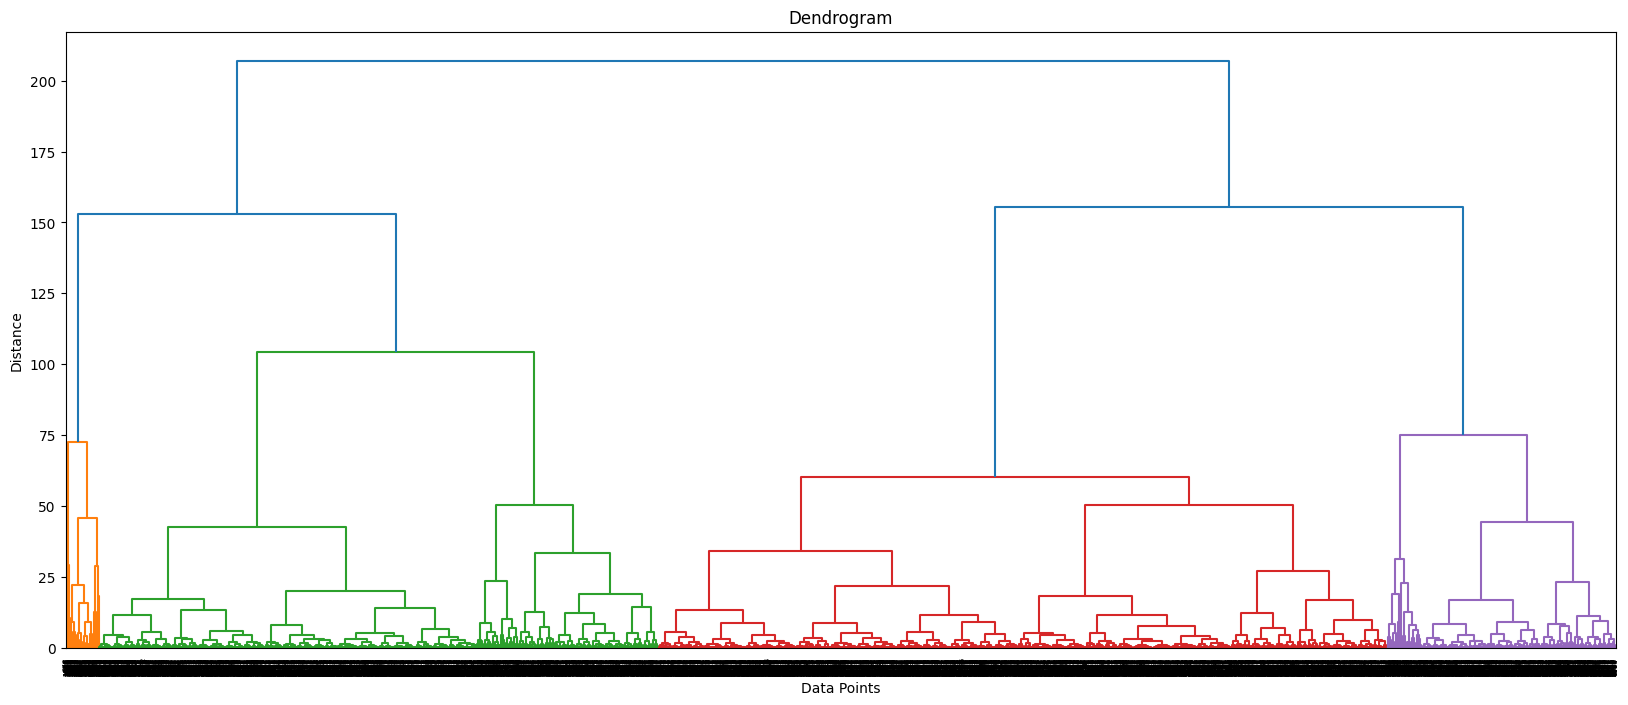

In [ ]:
linkage_matrix = linkage(transformed_df, method='ward')  # You can use other linkage methods as well

# Plotting the dendrogram
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### Mencari N cluster yang paling optimal

In [ ]:
from sklearn.metrics import davies_bouldin_score

silhoutte_scores = []
db_scores = []
for n in range(2, 11):
  model = AgglomerativeClustering(n_clusters=n).fit(transformed_df)

  # Calculate silhouette score
  silhouette_avg = silhouette_score(transformed_df, model.labels_)
  silhoutte_scores.append(silhouette_avg)

  db_index = davies_bouldin_score(transformed_df, model.labels_)
  db_scores.append(db_index)

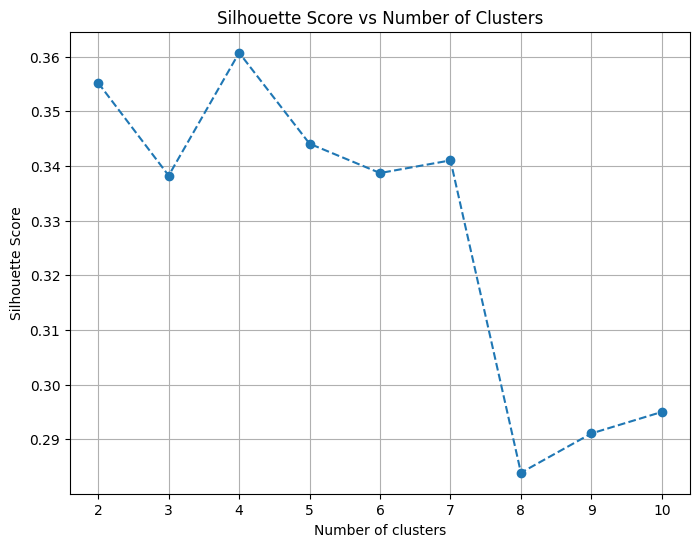

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhoutte_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

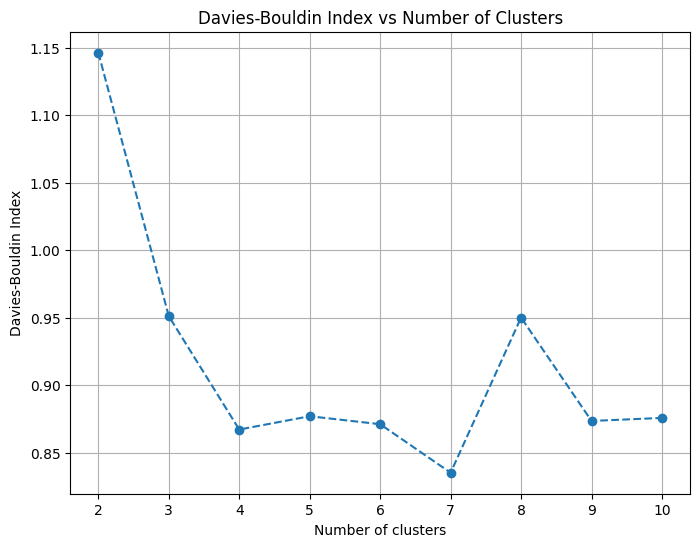

In [ ]:
# Plotting the Davies-Bouldin Index
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Didapat dari plot Silhouette Score & Davies-Bouldin Index, n = 4 adalah jumlah kluster yang paling optimal.

### Clustering

In [ ]:
# Perform clustering with 4 Cluster based on Silhoutte Score & Davies-Bouldin Index
model = AgglomerativeClustering(n_clusters=4, distance_threshold=None, linkage='ward')
model.fit(transformed_df)

AgglomerativeClustering(n_clusters=4)

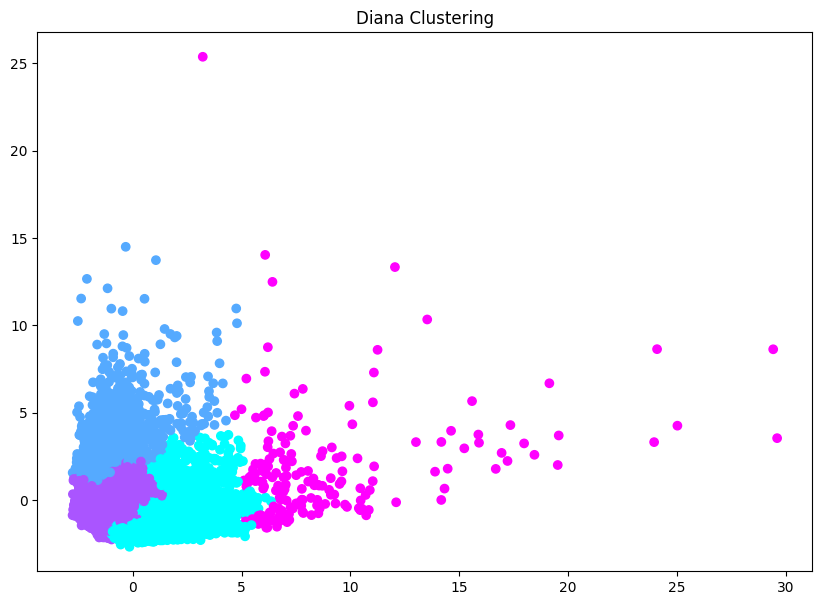

In [ ]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(transformed_df['PCA1'], transformed_df['PCA2'], c=model.labels_, cmap='cool')
plt.title('Diana Clustering')
plt.show()

## Evaluasi

In [ ]:
# Attach label hasil clustering pada DataFrame
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':model.labels_})],axis=1)

In [ ]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


<Axes: xlabel='Cluster', ylabel='count'>

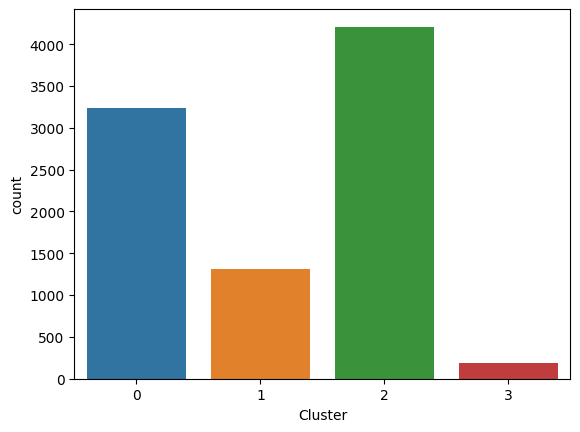

In [ ]:
sns.countplot(x='Cluster', data=cluster_df)

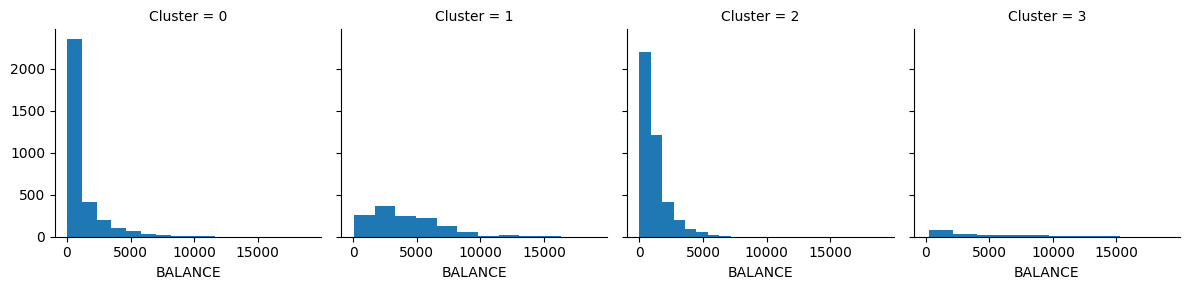

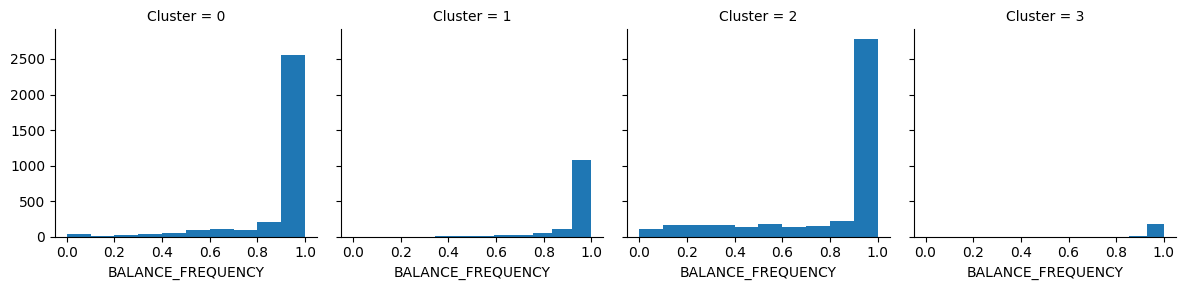

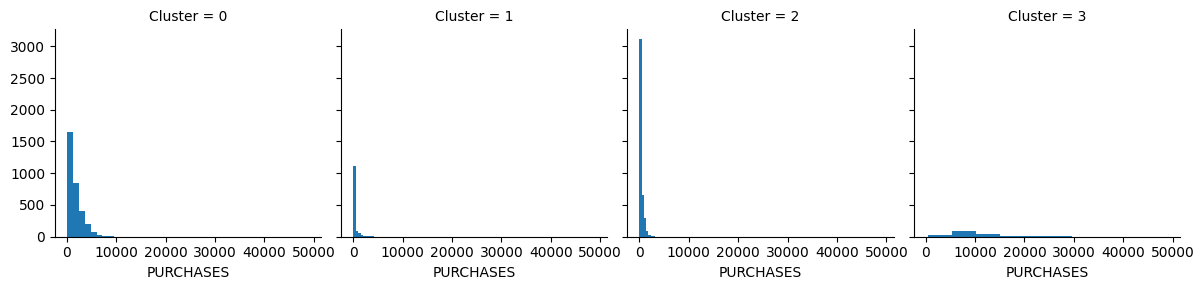

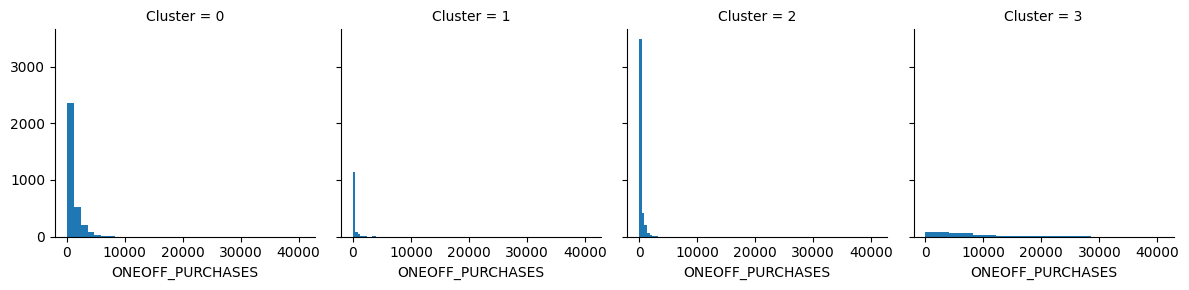

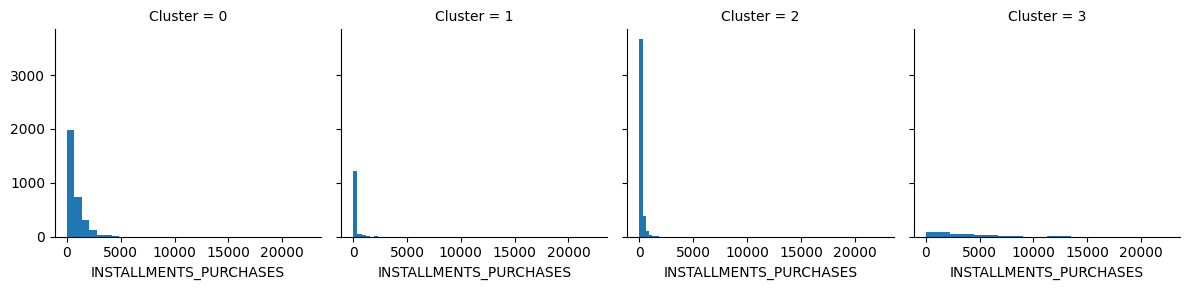

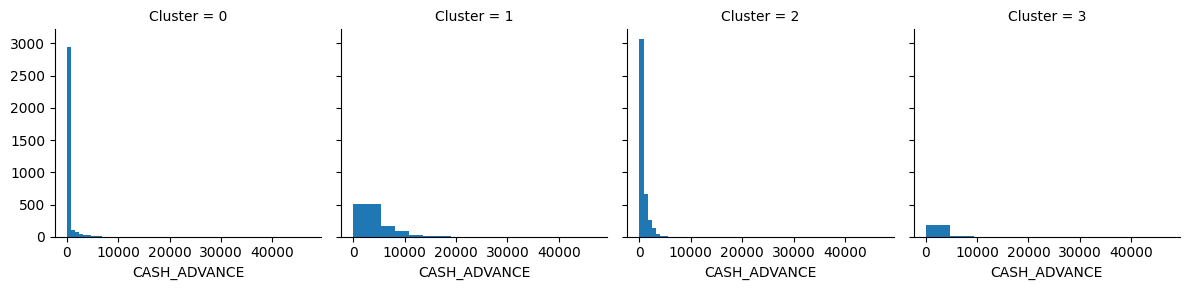

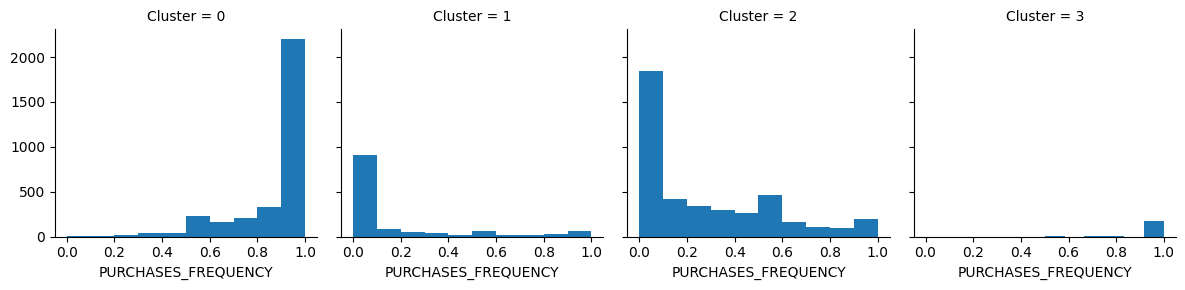

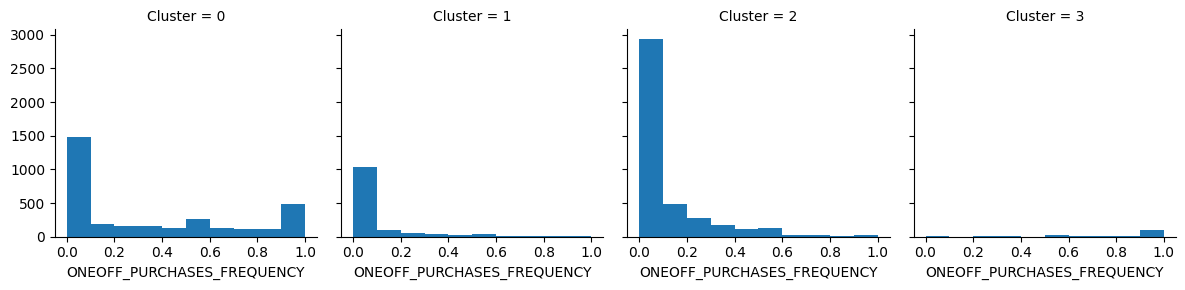

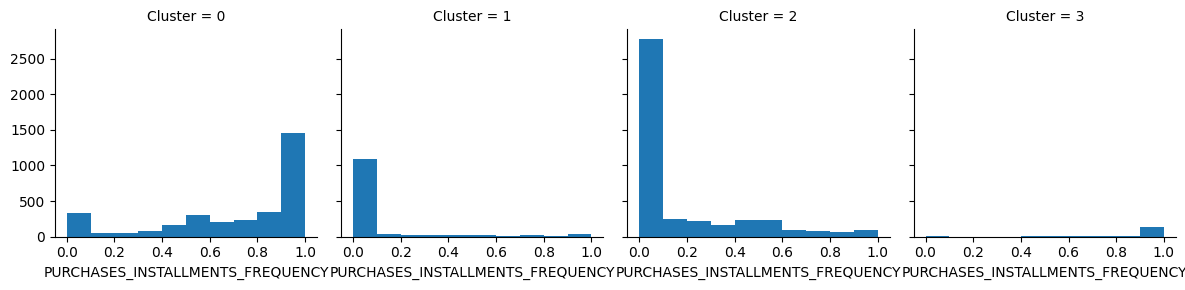

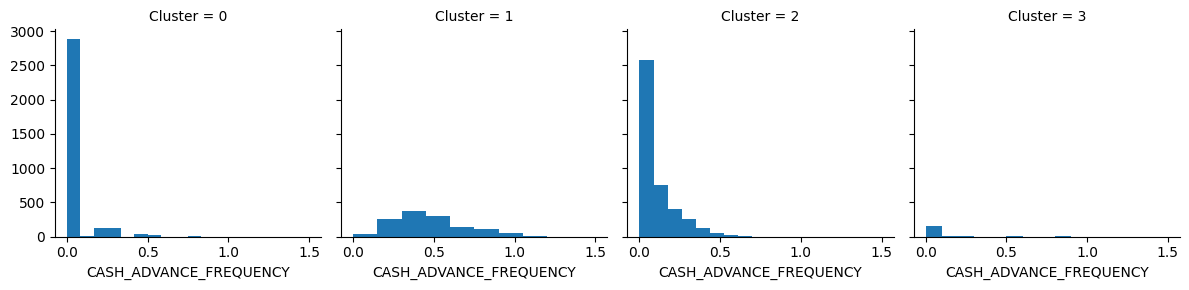

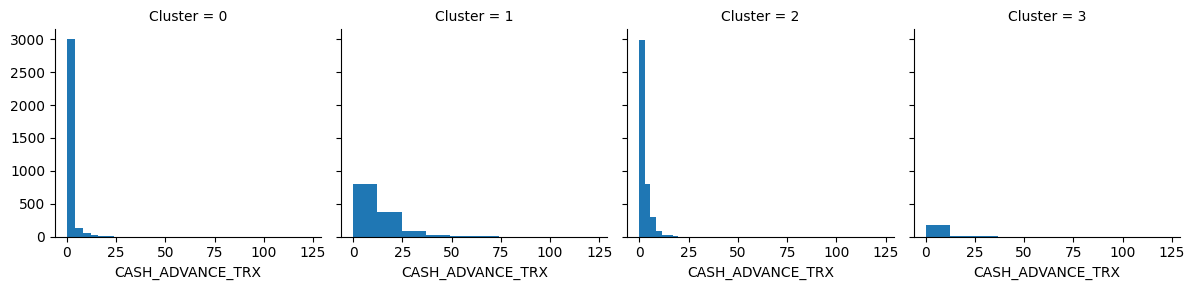

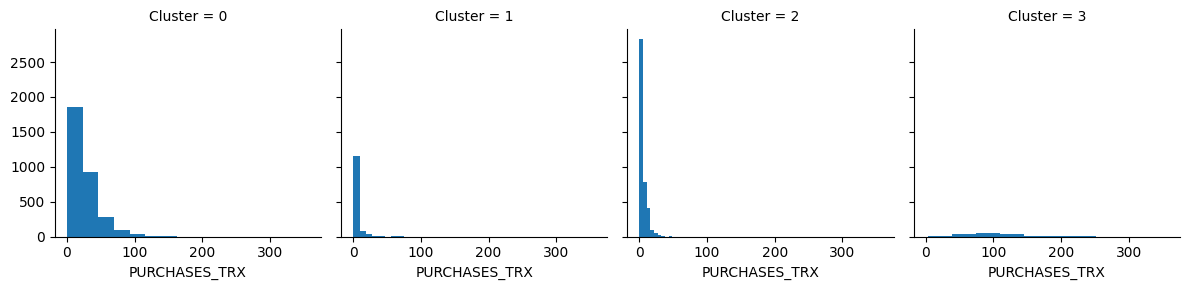

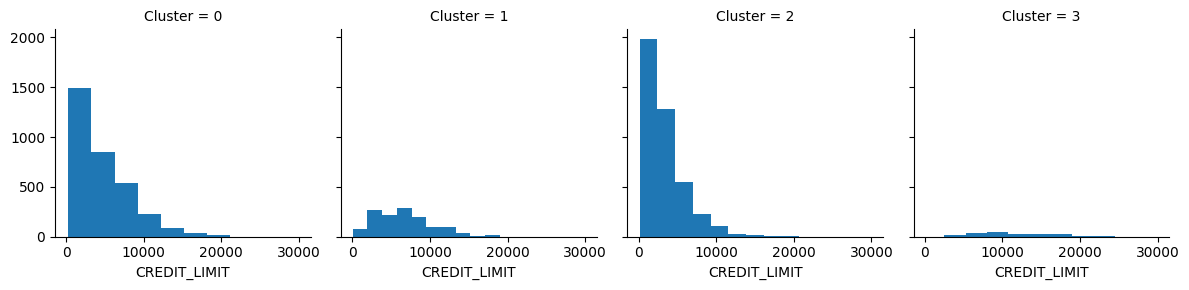

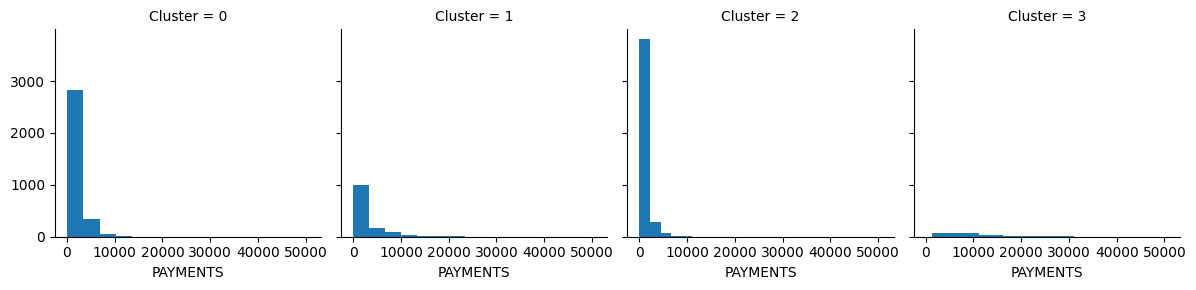

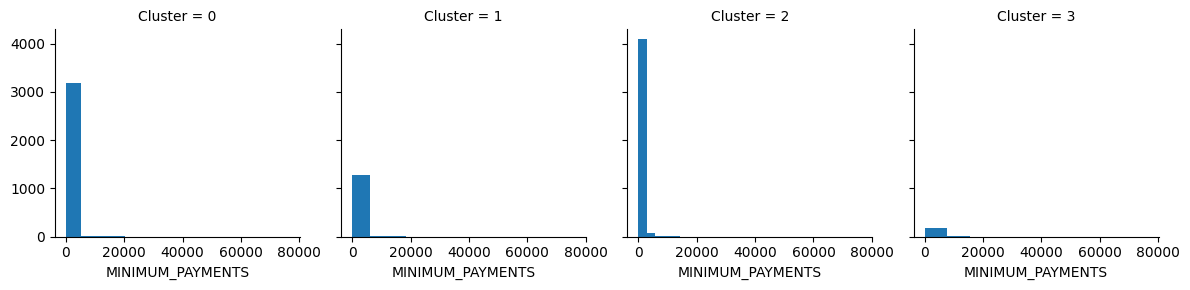

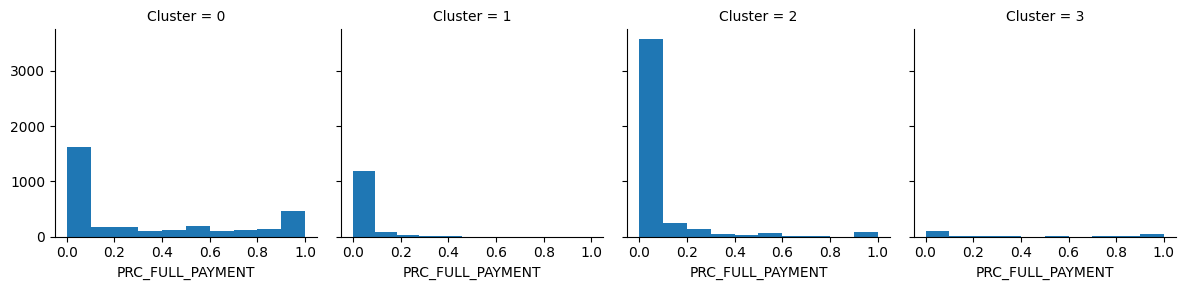

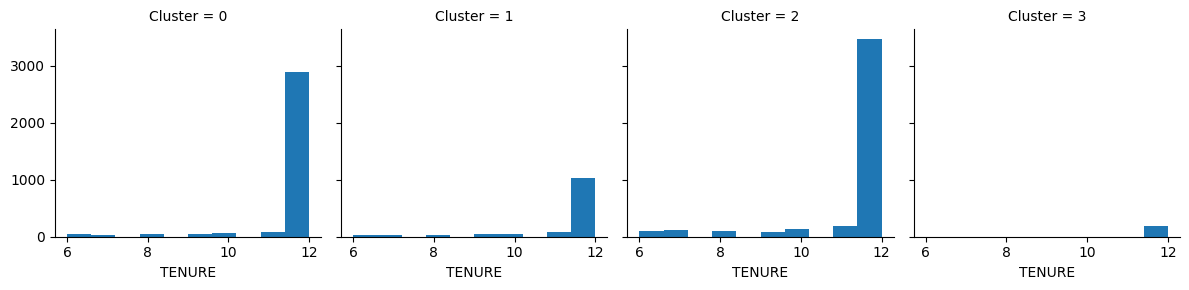

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()